In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 57.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=822e0af0646a4bc70a4fcb15a638166db412f5dcebe6fe

In [ ]:
import pandas as pd
import io
import matplotlib
import scipy
from scipy import stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from pandas_profiling import ProfileReport


<ipython-input-2-9cb39e080237>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
test_data = pd.read_csv('test_processed.csv')

ProfileReport(test_data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train_data = pd.read_csv('train_processed.csv')

ProfileReport(train_data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

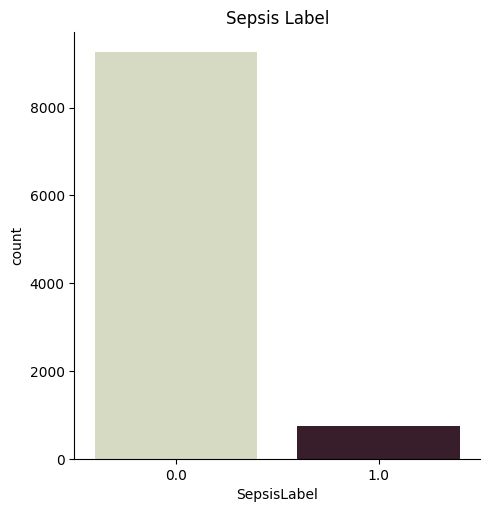

In [ ]:
sns.catplot(x="SepsisLabel", kind="count", palette="ch:.50", data=test_data).set(title='Sepsis Label')

Text(0.5, 1.0, 'Age Histogram')

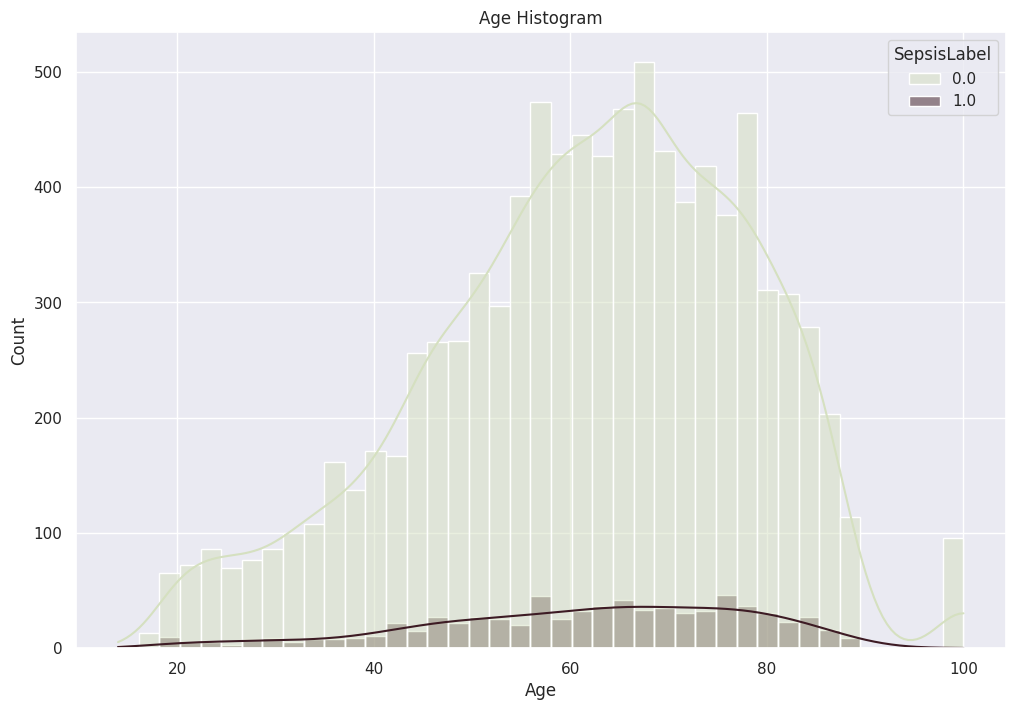

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=test_data, x="Age" ,kde=True, hue="SepsisLabel",  palette="ch:.60").set_title('Age Histogram')


Text(0.5, 1.0, 'Age Histogram')

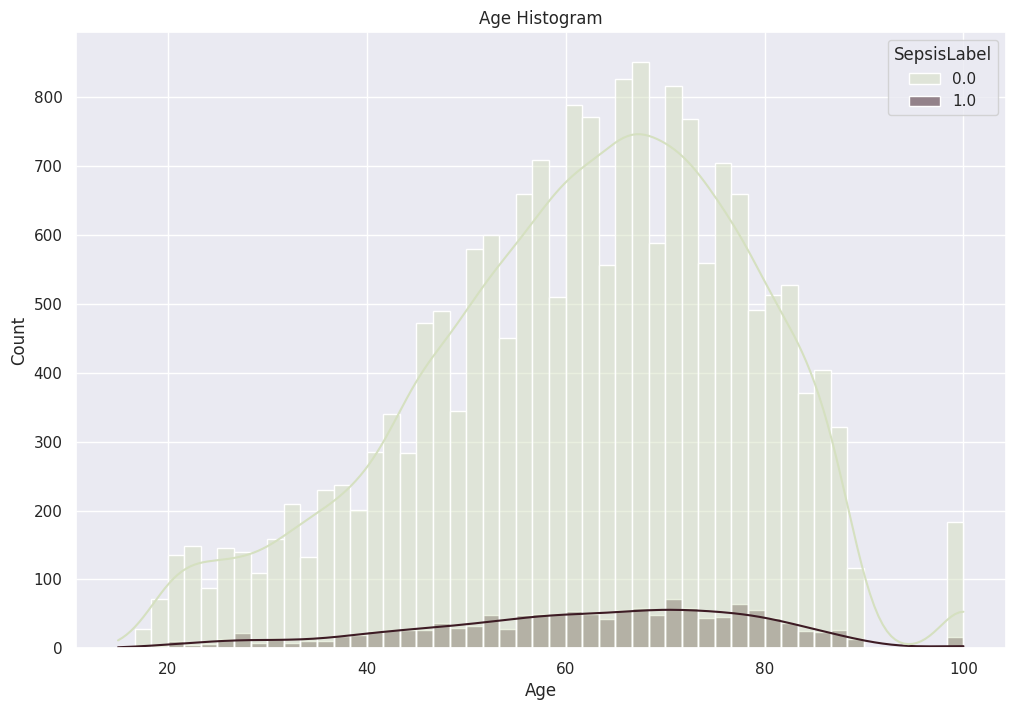

In [ ]:
sns.histplot(data=train_data, x="Age" ,kde=True, hue="SepsisLabel",  palette="ch:.60").set_title('Age Histogram')


<ipython-input-8-3a3226cb0b72>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=test_data[test_data['SepsisLabel']==1], x="Age",kde=True,  palette="hls2").set_title('Age Histogram')


Text(0.5, 1.0, 'Age Histogram')

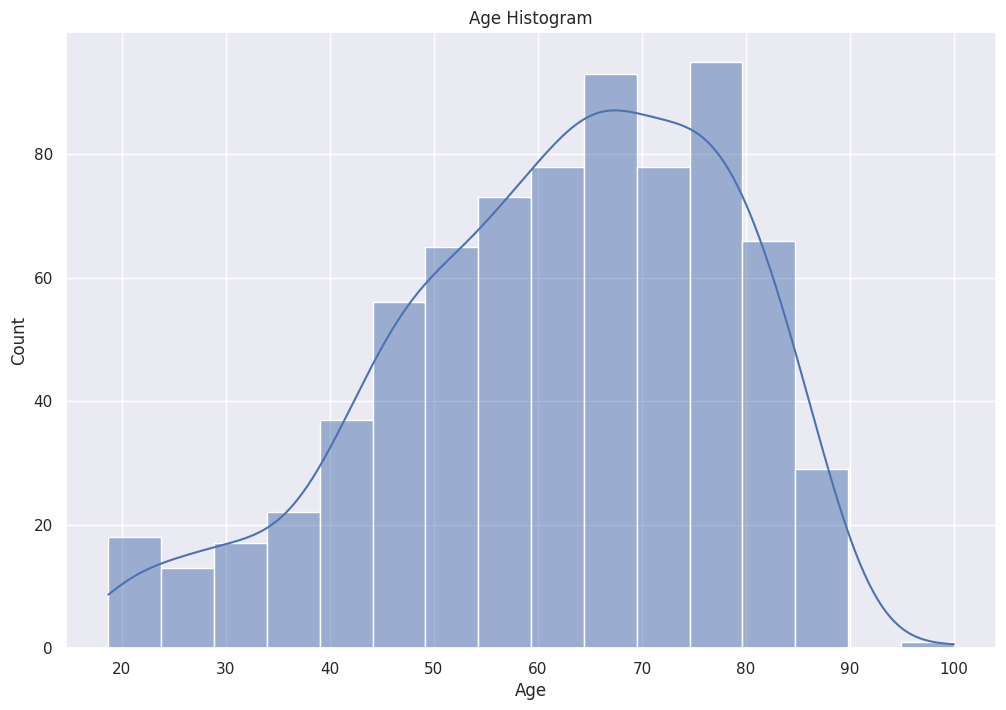

In [ ]:
sns.histplot(data=test_data[test_data['SepsisLabel']==1], x="Age",kde=True,  palette="hls2").set_title('Age Histogram')


<ipython-input-9-880143515de9>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=test_data[test_data['SepsisLabel']==0], x="Age",kde=True,  palette="hls2").set_title('Age Histogram')


Text(0.5, 1.0, 'Age Histogram')

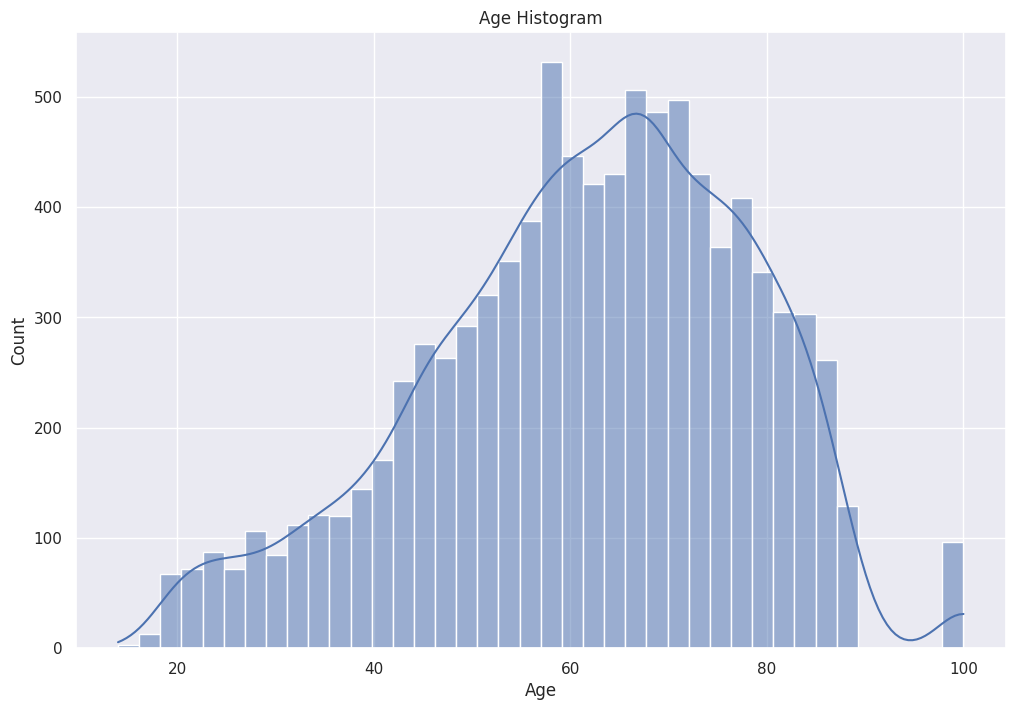

In [ ]:
sns.histplot(data=test_data[test_data['SepsisLabel']==0], x="Age",kde=True,  palette="hls2").set_title('Age Histogram')


<Axes: xlabel='SepsisLabel', ylabel='Temp'>

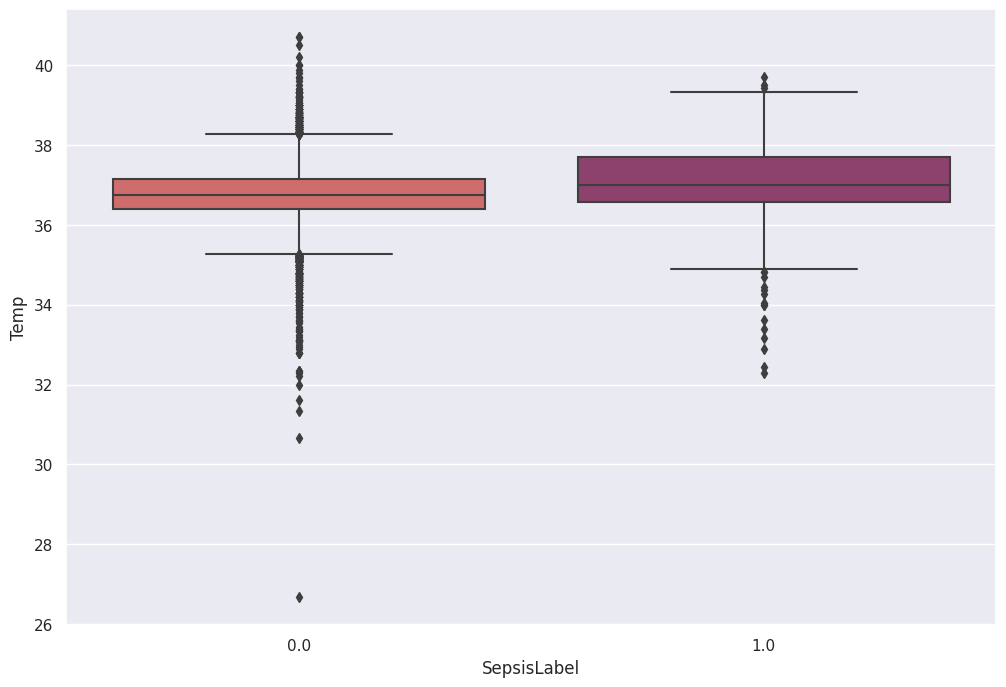

In [ ]:
sns.boxplot(x =train_data["SepsisLabel"], y=train_data["Temp"],  palette ="flare" )


<Axes: xlabel='SepsisLabel', ylabel='HR'>

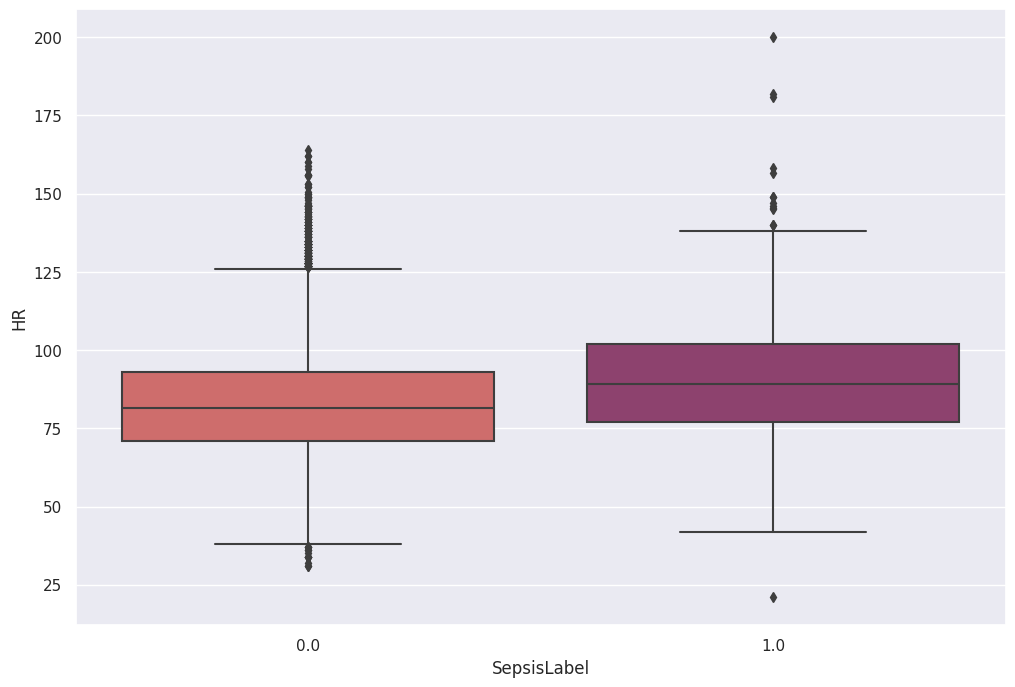

In [ ]:
sns.boxplot(x =train_data["SepsisLabel"], y=train_data["HR"],  palette ="flare" )


## מבחנים סטטיסטים
נבחן האם 
סימפטומים של אלח דם הם חום גבוה, דופק גבוה,ירידה בטסיות הדם יתכן גם לחץ דם נמוך

In [ ]:
# T test  תחת הנחת התפלגות נורמלית, נראה גם שהשונות דומה ותחת הנחה נוספת שהתםלגות ההפרש היא נורמלית נבצע

In [ ]:

sepsis_temp = train_data[train_data['SepsisLabel'] == 1]
sepsis_temp = sepsis_temp.Temp
sepsis_temp = np.array(sepsis_temp)


not_sepsis_temp = train_data[train_data['SepsisLabel'] == 0]
not_sepsis_temp = not_sepsis_temp.Temp
not_sepsis_temp = np.array(not_sepsis_temp)

mu_sepsis_temp = np.mean(sepsis_temp)
mu_non_sepsis_temp = np.mean(not_sepsis_temp)

n_sepsis = len(sepsis_temp)
n_non_sepsis = len(not_sepsis_temp)

sigma_sepsis_temp = math.sqrt(np.sum((sepsis_temp - mu_sepsis_temp)**2) / n_sepsis)
sigma_not_sepsis_temp = math.sqrt(np.sum((not_sepsis_temp - mu_non_sepsis_temp)**2) / n_non_sepsis)

d = mu_sepsis_temp - mu_non_sepsis_temp

print('mean of temp of patients with sepsis:', mu_sepsis_temp)
print('varience of temp of patients with sepsis:', sigma_sepsis_temp)
print('mean of temp of patients without sepsis:', mu_non_sepsis_temp)
print('varience of temp of patients without sepsis:', sigma_not_sepsis_temp)
print('the difference of means is: ', d)

mean of temp of patients with sepsis: 37.07611741190975
varience of temp of patients with sepsis: 0.873972987759184
mean of temp of patients without sepsis: 36.76810930704536
varience of temp of patients without sepsis: 0.6712240218361462
the difference of means is:  0.3080081048643919


In [ ]:
# T test
S_2 = ((n_sepsis - 1)*sigma_sepsis_temp**2 + (n_non_sepsis - 1)*sigma_not_sepsis_temp**2) / (n_sepsis + n_non_sepsis - 2)
se_t = np.sqrt(S_2) * np.sqrt((1 / n_sepsis) + (1 / n_non_sepsis))
T = d / se_t

pv = 2 - 2*stats.t.cdf(T, n_sepsis + n_non_sepsis - 2)
t_per = stats.t(df=n_sepsis + n_non_sepsis - 2).ppf((0.025, 0.975))

print('Subsection C\n')

print('T test:')
if  t_per[0] < T < t_per[1]:
  print('Accept H0')
else:
  print('Reject H0')


print('T is:', T)
print('H0 interval:', t_per)
print('P-value is:', pv)


Subsection C

T test:
Reject H0
T is: 16.244895648921773
H0 interval: [-1.96008262  1.96008262]
P-value is: 0.0


In [ ]:

sepsis_hr = train_data[train_data['SepsisLabel'] == 1]
sepsis_hr = sepsis_hr.HR
sepsis_hr = np.array(sepsis_hr)


not_sepsis_hr= train_data[train_data['SepsisLabel'] == 0]
not_sepsis_hr = not_sepsis_hr.HR
not_sepsis_hr = np.array(not_sepsis_hr)

mu_sepsis_hr = np.mean(sepsis_hr)
mu_non_sepsis_hr = np.mean(not_sepsis_hr)

n_sepsis = len(sepsis_hr)
n_non_sepsis = len(not_sepsis_hr)

sigma_sepsis_hr = math.sqrt(np.sum((sepsis_hr - mu_sepsis_hr)**2) / n_sepsis)
sigma_not_sepsis_hr = math.sqrt(np.sum((not_sepsis_hr - mu_non_sepsis_hr)**2) / n_non_sepsis)

d = mu_sepsis_hr - mu_non_sepsis_hr

print('mean of hr of patients with sepsis:', mu_sepsis_hr)
print('varience of hr of patients with sepsis:', sigma_sepsis_hr)
print('mean of hr of patients without sepsis:', mu_non_sepsis_hr)
print('varience of hr of patients without sepsis:', sigma_not_sepsis_hr)
print('the difference of means is: ', d)

mean of hr of patients with sepsis: 90.41795557200774
varience of hr of patients with sepsis: 18.931813129696742
mean of hr of patients without sepsis: 82.79727610503689
varience of hr of patients without sepsis: 17.089776994386146
the difference of means is:  7.620679466970856


In [ ]:
# T test
S_2 = ((n_sepsis - 1)*sigma_sepsis_hr**2 + (n_non_sepsis - 1)*sigma_not_sepsis_hr**2) / (n_sepsis + n_non_sepsis - 2)
se_t = np.sqrt(S_2) * np.sqrt((1 / n_sepsis) + (1 / n_non_sepsis))
T = d / se_t

pv = 2 - 2*stats.t.cdf(T, n_sepsis + n_non_sepsis - 2)
t_per = stats.t(df=n_sepsis + n_non_sepsis - 2).ppf((0.025, 0.975))

print('Subsection C\n')

print('T test:')
if  t_per[0] < T < t_per[1]:
  print('Accept H0')
else:
  print('Reject H0')


print('T is:', T)
print('H0 interval:', t_per)
print('P-value is:', pv)


Subsection C

T test:
Reject H0
T is: 16.041363973288988
H0 interval: [-1.96008262  1.96008262]
P-value is: 0.0


In [ ]:
import pandas as pd
df = pd.DataFrame({'a':[1,1,0,1,0], 'b':[1,0,1,1,1]})
df['c'] = df['a'] | df['b']


Index(['a', 'b', 'c'], dtype='object')
